In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [ ]:
# 1. Carregamento e divisão dos dados
df = pd.read_csv("train_w_metricas.csv",index_col=0)  

# removendo métricas irrelevantes 
columns_to_remove = [
    'label', 'code', 'cbo', 'cboModified', 'fanin', 'fanout', 'wmc', 
    'dit', 'noc', 'rfc', 'lcom', 'lcom*', 'tcc', 'lcc'
]
# Separando features e label
X = df.drop(columns=columns_to_remove, axis=1)  # As colunas CK são as features
y = df["label"]  # A label, com 1 para vulnerável e 0 para não vulnerável


In [3]:
# 2. Aplicação do SMOTE para balancear as classes
smote = SMOTE(random_state=None)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [4]:

# 4. Dividindo em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=None)


In [5]:

# 5. Configuração e ajuste do modelo Random Forest
# Definindo hiperparâmetros para a busca em grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}

# Configurando a busca de hiperparâmetros
rf = RandomForestClassifier(random_state=None)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Melhor modelo ajustado
best_rf = grid_search.best_estimator_



print("Melhores parâmetros:", grid_search.best_params_)



Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Melhores parâmetros: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [6]:

# 6. Avaliação do modelo no conjunto de teste
y_pred = best_rf.predict(X_test)

# Métricas de desempenho
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.7093
Precision: 0.7439
Recall: 0.6778
F1 Score: 0.7093


In [7]:
# Definindo os nomes das variáveis
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]

# Função para plotar a importância das variáveis
def plot_feature_importance(model, model_name):
    importances = model.feature_importances_
    sorted_idx = np.argsort(importances)[-5:]  # Seleciona as 5 variáveis mais importantes

    print("Variáveis mais importantes:")
    for i in sorted_idx:
        print(f"{feature_names[i]}: {importances[i]:.4f}")

    plt.figure(figsize=(8, 6))
    plt.barh(np.array(feature_names)[sorted_idx], importances[sorted_idx])
    plt.xlabel("Importância")
    plt.title("Variáveis")
    plt.show()

Variáveis mais importantes:
assignmentsQty: 0.0738
stringLiteralsQty: 0.0738
variablesQty: 0.0833
loc: 0.0984
uniqueWordsQty: 0.1442


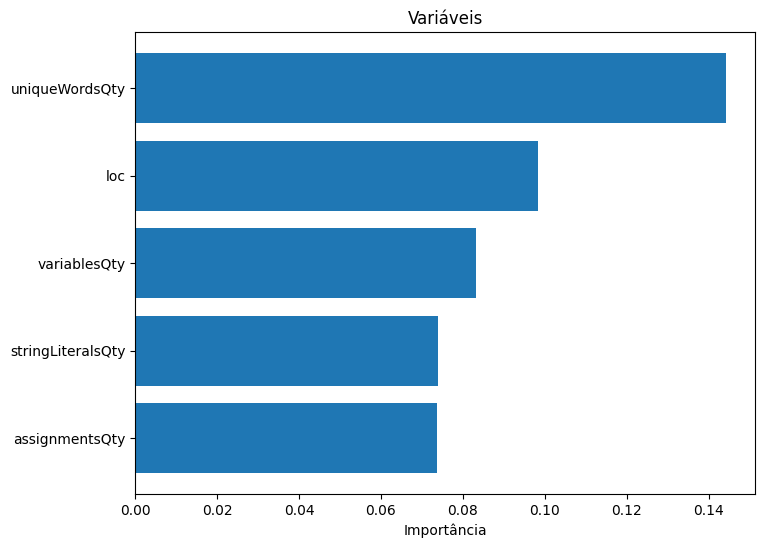

In [8]:
plot_feature_importance(best_rf, "Random Forest")
